In [7]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여소별 이용정보(시간대별)\\'
filename = '서울특별시 공공자전거 대여소별 이용정보(시간대별)_2022.parquet'
start_time = time.time()
df_2022 = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df_2022.head(5)

read_parquet time : 9.874850749969482


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,None,~10대,1,13.54,0.13,570.00,3
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,None,~10대,1,32.81,0.36,1534.33,12
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,None,~10대,1,19.10,0.17,720.00,4
3,2022-12-01,0,1355,1355. 보문2교,정기권,None,~10대,1,10.57,0.08,333.59,3
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,None,~10대,1,6.93,0.07,318.20,37


In [8]:
# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기
import ExcelFile_Merge as em
import ExcelFile_Read as er

In [9]:
import ExcelFile_EDA as ee
ee.ss_isnull(df_2022)

,[컬럼명],[sum],[sum_isnull],[mean_isnull(%)]
0,대여일자,36160476,0,0.000000
1,대여시간,36160476,0,0.000000
2,대여소번호,36160476,0,0.000000
3,대여소명,36160476,0,0.000000
4,대여구분코드,36160476,0,0.000000
5,성별,23845360,12315116,34.056842
6,연령대코드,36160476,0,0.000000
7,이용건수,36160476,0,0.000000
8,운동량,36023075,137401,0.379976
9,탄소량,36023075,137401,0.379976


In [10]:
df_2022.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,None,~10대,1,13.54,0.13,570.00,3
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,None,~10대,1,32.81,0.36,1534.33,12
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,None,~10대,1,19.10,0.17,720.00,4
3,2022-12-01,0,1355,1355. 보문2교,정기권,None,~10대,1,10.57,0.08,333.59,3
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,None,~10대,1,6.93,0.07,318.20,37


In [11]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160476 entries, 0 to 36160475
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      float64
 9   탄소량      float64
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 3.2+ GB


In [12]:
pd.options.display.float_format = '{:3}'.format

In [65]:
df_2022.shape

(36160476, 12)

In [66]:
df_2022.isnull().sum()

대여일자              0
대여시간              0
대여소번호             0
대여소명              0
대여구분코드            0
성별         12315116
연령대코드             0
이용건수              0
운동량          137401
탄소량          137401
이동거리(M)           0
이용시간(분)           0
dtype: int64

In [67]:
df_2022['대여시간'].value_counts()

대여시간
18    3323780
17    2801910
19    2448683
8     2377375
16    2270279
20    2083776
21    1910878
15    1910591
14    1729642
13    1696613
12    1684826
22    1588994
7     1581374
9     1568101
11    1517422
10    1316501
23    1084131
0      871207
6      672591
1      583418
2      374086
5      325862
3      244012
4      194424
Name: count, dtype: int64

## 1. 가설 1) 따릉이 최다 사용량이 출퇴근 시간이고 

### - 최다 사용량이 출퇴근 시간인 것을 확인한다.  

- 대여일자 컬럼을 datetime 형식으로 변환

In [71]:
df_2022['대여일자'] = pd.to_datetime(df_2022['대여일자'], format='%Y-%m-%d')
# df_2020['대여시간'].astype('datetime64[ns]')

In [72]:
print(df_2022['대여일자'].dtype)

datetime64[ns]


In [73]:
df_2022.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,None,~10대,1,13.54,0.13,570.0,3
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,None,~10대,1,32.81,0.36,1534.33,12
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,None,~10대,1,19.1,0.17,720.0,4
3,2022-12-01,0,1355,1355. 보문2교,정기권,None,~10대,1,10.57,0.08,333.59,3
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,None,~10대,1,6.93,0.07,318.2,37


- datetime 형식으로 변경된 '대여일자' 컬럼에서 요일을 추출하여 새로운 컬럼으로 저장

In [75]:
# dt.weekday : 요일 정보를 숫자로 추출 
# 0 : 월요일, 1 : 화요일, .... 6 : 일요일
df_2022['요일_인덱스'] = df_2022['대여일자'].dt.weekday

In [76]:
df_2022.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,None,~10대,1,13.54,0.13,570.0,3,3
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,None,~10대,1,32.81,0.36,1534.33,12,3
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,None,~10대,1,19.1,0.17,720.0,4,3
3,2022-12-01,0,1355,1355. 보문2교,정기권,None,~10대,1,10.57,0.08,333.59,3,3
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,None,~10대,1,6.93,0.07,318.2,37,3


In [77]:
# 0~6번 인덱스 위치에 각 한글 요일 이름이 담긴 리스트
weekday_list = ['월', '화', '수', '목', '금', '토', '일']

# apply 함수로 숫자 -> 요일 이름으로 변환
df_2022['요일'] = df_2022.apply(lambda x : weekday_list[x['요일_인덱스']], axis=1)

In [78]:
df_2022.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,None,~10대,1,13.54,0.13,570.0,3,3,목
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,None,~10대,1,32.81,0.36,1534.33,12,3,목
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,None,~10대,1,19.1,0.17,720.0,4,3,목
3,2022-12-01,0,1355,1355. 보문2교,정기권,None,~10대,1,10.57,0.08,333.59,3,3,목
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,None,~10대,1,6.93,0.07,318.2,37,3,목


In [79]:
df_2022[['요일', '대여시간']].value_counts(ascending=False)

요일  대여시간
금   18      558260
화   18      550419
수   18      548702
목   18      543856
월   18      499965
             ...  
화   3        26261
수   4        25880
월   3        24619
    4        23211
화   4        22656
Name: count, Length: 168, dtype: int64

In [80]:
grounded = df_2022.groupby(['요일', '대여시간'])['이용건수'].sum().unstack()
grounded

대여시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
요일,,,,,,,,,,,,,,,,,,,,,
금,141199,90263,55909,36128,30014,55212,124221,331413,539566,285808,...,273142,316118,382588,537136,683590,449063,358919,338841,300695,205718
목,127208,84233,51024,33111,27425,53432,123239,332583,525539,271645,...,243925,275657,366527,504322,676157,446377,368875,344182,290819,183968
수,120969,79163,48085,31130,26589,52309,120358,325569,517620,265461,...,247046,280331,360071,511069,683745,440583,363503,321347,259345,164995
월,107551,61913,38667,25611,23874,49814,110544,288182,453720,240230,...,229762,258434,327240,447657,624947,419984,349915,305747,239048,150182
일,172578,114889,74957,48772,33271,30957,44280,72926,116247,157283,...,326761,362393,383316,371039,334985,293336,267951,244840,194785,138492
토,175019,127056,85279,52908,36349,40840,61085,99709,174740,221613,...,347826,374207,400268,410761,382218,328620,308714,301289,261391,196614
화,109014,68791,42275,27096,23215,52337,122848,331431,529946,271129,...,231392,259618,351525,496949,691653,459829,371495,334665,271430,165019


In [81]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [82]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

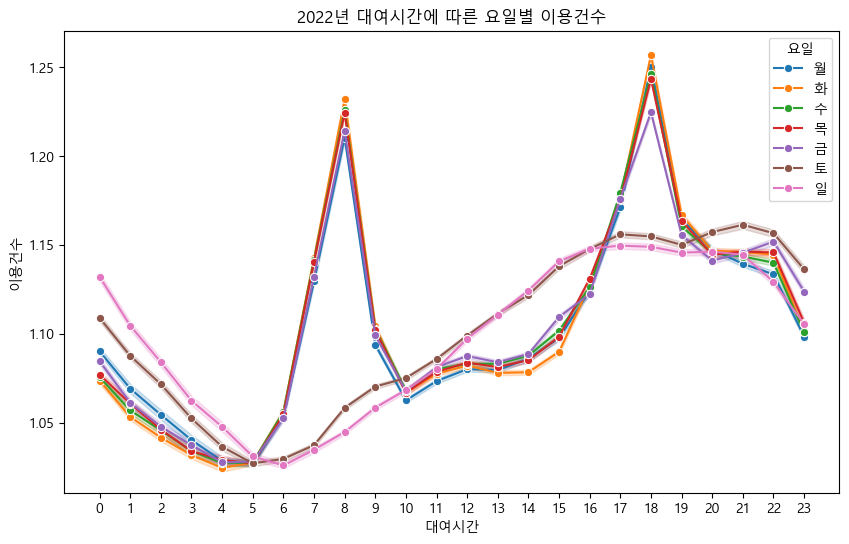

In [120]:
# 요일 순서 정의
weekday_order = ['월', '화', '수', '목', '금', '토', '일']

plt.figure(figsize=(10,6))
sns.lineplot(x='대여시간', y='이용건수', hue='요일', data=df_2022, marker='o', hue_order=weekday_order)
plt.title('2022년 대여시간에 따른 요일별 이용건수')
plt.xticks(range(0,24))
plt.xlabel('대여시간')
plt.ylabel('이용건수')
plt.show()

## 2. 가설 2) 출퇴근 시간에 따릉이 대여량이 최다인 대여소는 지하철역 인근 대여소일 것이다.

### - 출퇴근 시간 대여소별 사용량 확인

- 요일 : 월~금요일 추출한다.

In [124]:
df_2022.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,None,~10대,1,13.54,0.13,570.0,3,3,목
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,None,~10대,1,32.81,0.36,1534.33,12,3,목
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,None,~10대,1,19.1,0.17,720.0,4,3,목
3,2022-12-01,0,1355,1355. 보문2교,정기권,None,~10대,1,10.57,0.08,333.59,3,3,목
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,None,~10대,1,6.93,0.07,318.2,37,3,목


In [125]:
df_2022.count()

대여일자       36160476
대여시간       36160476
대여소번호      36160476
대여소명       36160476
대여구분코드     36160476
성별         23845360
연령대코드      36160476
이용건수       36160476
운동량        36023075
탄소량        36023075
이동거리(M)    36160476
이용시간(분)    36160476
요일_인덱스     36160476
요일         36160476
dtype: int64

In [126]:
df_2022_day = df_2022[~(df_2022['요일'].isin(['토', '일']))]
df_2022_day

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,None,~10대,1,13.54,0.13,570.0,3,3,목
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,None,~10대,1,32.81,0.36,1534.33,12,3,목
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,None,~10대,1,19.1,0.17,720.0,4,3,목
3,2022-12-01,0,1355,1355. 보문2교,정기권,None,~10대,1,10.57,0.08,333.59,3,3,목
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,None,~10대,1,6.93,0.07,318.2,37,3,목
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36160471,2022-11-30,23,3010,3010.홍대입구역 3번출구,정기권,M,기타,1,24.37,0.22,946.92,4,2,수
36160472,2022-11-30,23,3127,3127.홍은2파출소 옆,정기권,M,기타,1,3.99,0.03,141.88,2,2,수
36160473,2022-11-30,23,232,232. 양평우림 이비즈센타 앞,정기권,M,기타,1,14.24,0.1,438.61,3,2,수
36160474,2022-11-30,23,4594,4594. 양평교 영등포대여소,정기권,M,기타,1,83.98,0.73,3165.07,79,2,수


- '출퇴근' 컬럼을 새로 만들어서 출근, 퇴근을 넣어준다. (월~금요일, 출퇴근)

In [128]:
df_2022_day.loc[df_2022_day['대여시간'].isin([7,8]),'출퇴근'] = '출근'
df_2022_day.loc[df_2022_day['대여시간'].isin([17,18]),'출퇴근'] = '퇴근'

C:\Users\user\AppData\Local\Temp\ipykernel_10900\3710577634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_day.loc[df_2022_day['대여시간'].isin([7,8]),'출퇴근'] = '출근'


In [129]:
df_2022_day

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,None,~10대,1,13.54,0.13,570.0,3,3,목,NaN
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,None,~10대,1,32.81,0.36,1534.33,12,3,목,NaN
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,None,~10대,1,19.1,0.17,720.0,4,3,목,NaN
3,2022-12-01,0,1355,1355. 보문2교,정기권,None,~10대,1,10.57,0.08,333.59,3,3,목,NaN
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,None,~10대,1,6.93,0.07,318.2,37,3,목,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36160471,2022-11-30,23,3010,3010.홍대입구역 3번출구,정기권,M,기타,1,24.37,0.22,946.92,4,2,수,NaN
36160472,2022-11-30,23,3127,3127.홍은2파출소 옆,정기권,M,기타,1,3.99,0.03,141.88,2,2,수,NaN
36160473,2022-11-30,23,232,232. 양평우림 이비즈센타 앞,정기권,M,기타,1,14.24,0.1,438.61,3,2,수,NaN
36160474,2022-11-30,23,4594,4594. 양평교 영등포대여소,정기권,M,기타,1,83.98,0.73,3165.07,79,2,수,NaN


In [130]:
df_2022_day[df_2022_day['출퇴근'] == '출근'] # df_parquet[df_parquet['이용건수'] == '\\N']

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
5867,2022-12-01,7,1260,1260. 방이동 한양3차아파트 옆,정기권,None,~10대,1,15.22,0.14,620.0,3,3,목,출근
5868,2022-12-01,7,1264,1264. 천호역 10번 출구 앞,정기권,None,~10대,1,14.26,0.14,600.0,3,3,목,출근
5869,2022-12-01,7,1167,1167. 마곡수명산파크3단지 교차로,정기권,None,~10대,1,13.9,0.13,540.0,4,3,목,출근
5870,2022-12-01,7,1050,1050. 둔촌역 3번 출입구,정기권,None,~10대,1,24.97,0.23,970.0,4,3,목,출근
5871,2022-12-01,7,1051,"1051. 강일중,선사고 버스정류장(신암중학교 방면)",정기권,None,~10대,1,45.86,0.31,1346.65,8,3,목,출근
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36109727,2022-11-30,8,2304,2304. 대현그린타워,정기권,M,기타,1,67.08,0.69,2971.86,22,2,수,출근
36109728,2022-11-30,8,1106,1106. 신방화사거리,정기권,M,기타,1,44.98,0.34,1456.19,7,2,수,출근
36109729,2022-11-30,8,1941,1941. 오류동역 2번출구,정기권,M,기타,1,48.79,0.48,2053.27,12,2,수,출근
36109730,2022-11-30,8,2252,2252. 잔디마을 마을버스 정류장,정기권,M,기타,1,168.28,1.54,6640.0,51,2,수,출근


In [131]:
df_2022_day[df_2022_day['출퇴근'] == '퇴근']

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
42169,2022-12-01,17,729,729. 서부식자재마트 건너편,정기권,None,~10대,1,58.56,0.44,1895.75,10,3,목,퇴근
42170,2022-12-01,17,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,None,~10대,1,58.92,0.43,1860.0,10,3,목,퇴근
42171,2022-12-01,17,1653,1653. 노원역1번출구,정기권,None,~10대,1,13.13,0.12,510.0,4,3,목,퇴근
42172,2022-12-01,17,1277,1277. 성내6교,정기권,None,~10대,1,0.0,0.0,0.0,1,3,목,퇴근
42173,2022-12-01,17,1682,1682. 중계종합사회복지관 교차로,정기권,None,~10대,1,24.66,0.22,958.13,8,3,목,퇴근
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36147036,2022-11-30,18,2102,2102. 봉림교 교통섬,정기권,M,기타,1,77.62,0.65,2800.0,22,2,수,퇴근
36147037,2022-11-30,18,2305,2305. MCM 본사 직영점 앞,정기권,M,기타,1,128.83,0.83,3575.15,19,2,수,퇴근
36147038,2022-11-30,18,1227,1227. 거여역 8번출구 뒤,정기권,M,기타,1,39.67,0.37,1590.0,7,2,수,퇴근
36147039,2022-11-30,18,1925,1925. 동양미래대학교 정문 옆,정기권,M,기타,1,102.64,0.72,3122.75,20,2,수,퇴근


In [132]:
df_2022_day['출퇴근'].unique()

array([nan, '출근', '퇴근'], dtype=object)

In [133]:
df_2022_day['출퇴근'].value_counts()

출퇴근
퇴근    4824973
출근    3515794
Name: count, dtype: int64

In [134]:
df_2022_day.count()

대여일자       26936528
대여시간       26936528
대여소번호      26936528
대여소명       26936528
대여구분코드     26936528
성별         17808304
연령대코드      26936528
이용건수       26936528
운동량        26832133
탄소량        26832133
이동거리(M)    26936528
이용시간(분)    26936528
요일_인덱스     26936528
요일         26936528
출퇴근         8340767
dtype: int64

In [135]:
df_2022_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26936528 entries, 0 to 36160475
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     int64         
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  int64         
 12  요일_인덱스   int32         
 13  요일       object        
 14  출퇴근      object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(6)
memory usage: 3.1+ GB


In [136]:
df_2022_day.loc[:, '이용건수'] = df_2022_day['이용건수'].astype(int)

In [137]:
df_2022_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26936528 entries, 0 to 36160475
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     int64         
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  int64         
 12  요일_인덱스   int32         
 13  요일       object        
 14  출퇴근      object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(6)
memory usage: 3.1+ GB


In [138]:
df_2022_time = df_2022_day[~df_2022_day['출퇴근'].isnull()] # df_2020_day.dropna(subset=['출퇴근'])

In [139]:
df_2022_time

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
5867,2022-12-01,7,1260,1260. 방이동 한양3차아파트 옆,정기권,None,~10대,1,15.22,0.14,620.0,3,3,목,출근
5868,2022-12-01,7,1264,1264. 천호역 10번 출구 앞,정기권,None,~10대,1,14.26,0.14,600.0,3,3,목,출근
5869,2022-12-01,7,1167,1167. 마곡수명산파크3단지 교차로,정기권,None,~10대,1,13.9,0.13,540.0,4,3,목,출근
5870,2022-12-01,7,1050,1050. 둔촌역 3번 출입구,정기권,None,~10대,1,24.97,0.23,970.0,4,3,목,출근
5871,2022-12-01,7,1051,"1051. 강일중,선사고 버스정류장(신암중학교 방면)",정기권,None,~10대,1,45.86,0.31,1346.65,8,3,목,출근
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36147036,2022-11-30,18,2102,2102. 봉림교 교통섬,정기권,M,기타,1,77.62,0.65,2800.0,22,2,수,퇴근
36147037,2022-11-30,18,2305,2305. MCM 본사 직영점 앞,정기권,M,기타,1,128.83,0.83,3575.15,19,2,수,퇴근
36147038,2022-11-30,18,1227,1227. 거여역 8번출구 뒤,정기권,M,기타,1,39.67,0.37,1590.0,7,2,수,퇴근
36147039,2022-11-30,18,1925,1925. 동양미래대학교 정문 옆,정기권,M,기타,1,102.64,0.72,3122.75,20,2,수,퇴근


In [140]:
df_2022_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8340767 entries, 5867 to 36147040
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     int64         
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  int64         
 12  요일_인덱스   int32         
 13  요일       object        
 14  출퇴근      object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(6)
memory usage: 986.3+ MB


In [141]:
df_2022_time.count()

대여일자       8340767
대여시간       8340767
대여소번호      8340767
대여소명       8340767
대여구분코드     8340767
성별         5545162
연령대코드      8340767
이용건수       8340767
운동량        8305855
탄소량        8305855
이동거리(M)    8340767
이용시간(분)    8340767
요일_인덱스     8340767
요일         8340767
출퇴근        8340767
dtype: int64

In [142]:
import time
import pandas as  pd

filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울시 공공자전거 대여소 정보\\'
filename = '공공자전거 대여소 정보_통합본_최종.parquet'
start_time = time.time()
df_st = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)
df_st.head(5)

read_parquet time : 0.09162712097167969


,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,06173,서울자동차운전전문학원,강서구,강서구 남부순환로 216,37.54613495,126.8210602,2024-03-18,NaN,10.0,QR,2024-06,ST-3284,NaN
1,02902,공릉풍림아파트 108동,노원구,서울특별시 노원구 섬밭로 139 공릉풍림아파트,37.62862015,127.0669098,2020-03-24,NaN,12.0,QR,2024-06,ST-2068,NaN
2,02912,대진고등학교,노원구,서울특별시 노원구 한글비석로 97,37.63815689,127.0732651,2020-03-23,NaN,20.0,QR,2024-06,ST-2078,NaN
3,02911,상계역중앙시장,노원구,서울특별시 노원구 한글비석로 389-2 가로판매대,37.6588707,127.0719147,2020-03-23,NaN,7.0,QR,2024-06,ST-2077,NaN
4,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.62186432,127.0740509,2020-03-25,NaN,10.0,QR,2024-06,None,NaN


In [143]:
df_st.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,데이터등록월,대여소ID,거치대수
0,06173,서울자동차운전전문학원,강서구,강서구 남부순환로 216,37.54613495,126.8210602,2024-03-18,NaN,10.0,QR,2024-06,ST-3284,NaN
1,02902,공릉풍림아파트 108동,노원구,서울특별시 노원구 섬밭로 139 공릉풍림아파트,37.62862015,127.0669098,2020-03-24,NaN,12.0,QR,2024-06,ST-2068,NaN
2,02912,대진고등학교,노원구,서울특별시 노원구 한글비석로 97,37.63815689,127.0732651,2020-03-23,NaN,20.0,QR,2024-06,ST-2078,NaN
3,02911,상계역중앙시장,노원구,서울특별시 노원구 한글비석로 389-2 가로판매대,37.6588707,127.0719147,2020-03-23,NaN,7.0,QR,2024-06,ST-2077,NaN
4,02910,도깨비시장,노원구,서울특별시 노원구 동일로 1028 한의학명가,37.62186432,127.0740509,2020-03-25,NaN,10.0,QR,2024-06,None,NaN


In [144]:
df_st.info() # 대여소번호 int / object 다름. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2960 non-null   object 
 1   대여소명    2960 non-null   object 
 2   자치구     2960 non-null   object 
 3   상세주소    2960 non-null   object 
 4   위도      2959 non-null   float64
 5   경도      2959 non-null   float64
 6   설치시기    2921 non-null   object 
 7   LCD     1517 non-null   float64
 8   QR      1752 non-null   float64
 9   운영방식    2921 non-null   object 
 10  데이터등록월  2921 non-null   object 
 11  대여소ID   2701 non-null   object 
 12  거치대수    39 non-null     float64
dtypes: float64(5), object(8)
memory usage: 300.8+ KB


In [145]:
df_st.shape

(2960, 13)

In [146]:
# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기
import ExcelFile_Merge as em
import ExcelFile_Read as er

import ExcelFile_EDA as ee
ee.ss_isnull(df_st)

,[컬럼명],[sum],[sum_isnull],[mean_isnull(%)]
0,대여소번호,2960,0,0.0
1,대여소명,2960,0,0.0
2,자치구,2960,0,0.0
3,상세주소,2960,0,0.0
4,위도,2959,1,0.033783783783783786
5,경도,2959,1,0.033783783783783786
6,설치시기,2921,39,1.3175675675675675
7,LCD,1517,1443,48.75
8,QR,1752,1208,40.81081081081081
9,운영방식,2921,39,1.3175675675675675


In [147]:
df_st_1 = df_st[['대여소번호', '대여소명', '자치구', '설치시기', '데이터등록월']]
df_st_1

,대여소번호,대여소명,자치구,설치시기,데이터등록월
0,06173,서울자동차운전전문학원,강서구,2024-03-18,2024-06
1,02902,공릉풍림아파트 108동,노원구,2020-03-24,2024-06
2,02912,대진고등학교,노원구,2020-03-23,2024-06
3,02911,상계역중앙시장,노원구,2020-03-23,2024-06
4,02910,도깨비시장,노원구,2020-03-25,2024-06
...,...,...,...,...,...
2955,05884,GS강서타워,영등포구,None,None
2956,05885,신정교하부(도림천역 방면),영등포구,None,None
2957,06060,신한은행 본점,중구,None,None
2958,06176,유광사 여성병원 앞,강서구,None,None


- 시간대별 데이터, 대여소정보 데이터 에서 '대여소번호' 컬럼의 숫자 표현방식, 데이터 타입이 다르다.

- 따라서, 1. 시간대별 데이터(월~금 / 출퇴근 시간대 추출함)의 '대여소번호' 컬럼의 숫자를 object로 바꾸어준다.
     ##### 2. 시간대별 데이터의 '대여소번호' 컬럼의 숫자를 00000 자리로 바꾸어준다. 

In [150]:
df_2022_time.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
5867,2022-12-01,7,1260,1260. 방이동 한양3차아파트 옆,정기권,None,~10대,1,15.22,0.14,620.0,3,3,목,출근
5868,2022-12-01,7,1264,1264. 천호역 10번 출구 앞,정기권,None,~10대,1,14.26,0.14,600.0,3,3,목,출근
5869,2022-12-01,7,1167,1167. 마곡수명산파크3단지 교차로,정기권,None,~10대,1,13.9,0.13,540.0,4,3,목,출근
5870,2022-12-01,7,1050,1050. 둔촌역 3번 출입구,정기권,None,~10대,1,24.97,0.23,970.0,4,3,목,출근
5871,2022-12-01,7,1051,"1051. 강일중,선사고 버스정류장(신암중학교 방면)",정기권,None,~10대,1,45.86,0.31,1346.65,8,3,목,출근


In [151]:
df_2022_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8340767 entries, 5867 to 36147040
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     int64         
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  int64         
 12  요일_인덱스   int32         
 13  요일       object        
 14  출퇴근      object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(6)
memory usage: 986.3+ MB


In [152]:
df_2022_time.loc[:, '대여소번호'] = df_2022_time['대여소번호'].astype(str)

C:\Users\user\AppData\Local\Temp\ipykernel_10900\1162110550.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1260' '1264' '1167' ... '1227' '1925' '723']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_2022_time.loc[:, '대여소번호'] = df_2022_time['대여소번호'].astype(str)


In [153]:
df_2022_time.dtypes

대여일자       datetime64[ns]
대여시간                int64
대여소번호              object
대여소명               object
대여구분코드             object
성별                 object
연령대코드              object
이용건수                int64
운동량               float64
탄소량               float64
이동거리(M)           float64
이용시간(분)             int64
요일_인덱스              int32
요일                 object
출퇴근                object
dtype: object

In [154]:
df_2022_time.loc[:,'대여소번호'] = df_2022_time['대여소번호'].str.zfill(5)

In [155]:
df_2022_time.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근
5867,2022-12-01,7,01260,1260. 방이동 한양3차아파트 옆,정기권,None,~10대,1,15.22,0.14,620.0,3,3,목,출근
5868,2022-12-01,7,01264,1264. 천호역 10번 출구 앞,정기권,None,~10대,1,14.26,0.14,600.0,3,3,목,출근
5869,2022-12-01,7,01167,1167. 마곡수명산파크3단지 교차로,정기권,None,~10대,1,13.9,0.13,540.0,4,3,목,출근
5870,2022-12-01,7,01050,1050. 둔촌역 3번 출입구,정기권,None,~10대,1,24.97,0.23,970.0,4,3,목,출근
5871,2022-12-01,7,01051,"1051. 강일중,선사고 버스정류장(신암중학교 방면)",정기권,None,~10대,1,45.86,0.31,1346.65,8,3,목,출근


In [156]:
df_sum = pd.merge(df_2022_time, df_st_1, on='대여소번호', how='left')
df_sum

,대여일자,대여시간,대여소번호,대여소명_x,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일,출퇴근,대여소명_y,자치구,설치시기,데이터등록월
0,2022-12-01,7,01260,1260. 방이동 한양3차아파트 옆,정기권,None,~10대,1,15.22,0.14,620.0,3,3,목,출근,방이동 한양3차아파트 옆,송파구,2017-11-01,2024-06
1,2022-12-01,7,01264,1264. 천호역 10번 출구 앞,정기권,None,~10대,1,14.26,0.14,600.0,3,3,목,출근,천호역 10번 출구 앞,송파구,2017-11-01,2024-06
2,2022-12-01,7,01167,1167. 마곡수명산파크3단지 교차로,정기권,None,~10대,1,13.9,0.13,540.0,4,3,목,출근,마곡수명산파크3단지 교차로,강서구,2017-12-22,2024-06
3,2022-12-01,7,01050,1050. 둔촌역 3번 출입구,정기권,None,~10대,1,24.97,0.23,970.0,4,3,목,출근,둔촌역 3번 출입구,강동구,2018-02-26,2024-06
4,2022-12-01,7,01051,"1051. 강일중,선사고 버스정류장(신암중학교 방면)",정기권,None,~10대,1,45.86,0.31,1346.65,8,3,목,출근,"강일중,선사고 버스정류장(신암중학교 방면)",강동구,2018-02-26,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8340762,2022-11-30,18,02102,2102. 봉림교 교통섬,정기권,M,기타,1,77.62,0.65,2800.0,22,2,수,퇴근,봉림교 교통섬,관악구,2017-05-12,2024-06
8340763,2022-11-30,18,02305,2305. MCM 본사 직영점 앞,정기권,M,기타,1,128.83,0.83,3575.15,19,2,수,퇴근,MCM 본사 직영점 앞,강남구,2017-06-13,2024-06
8340764,2022-11-30,18,01227,1227. 거여역 8번출구 뒤,정기권,M,기타,1,39.67,0.37,1590.0,7,2,수,퇴근,거여역 8번출구 뒤,송파구,2017-06-27,2024-06
8340765,2022-11-30,18,01925,1925. 동양미래대학교 정문 옆,정기권,M,기타,1,102.64,0.72,3122.75,20,2,수,퇴근,동양미래대학교 정문 옆,구로구,2017-06-27,2024-06


In [157]:
group1 = df_sum.groupby(['대여소명_y', '출퇴근'])['이용건수'].sum().reset_index()
group1

,대여소명_y,출퇴근,이용건수
0,(시립)고덕평생학습관,출근,694
1,(시립)고덕평생학습관,퇴근,981
2,(재)FITI시험연구원,출근,3624
3,(재)FITI시험연구원,퇴근,4033
4,3호선 매봉역 3번출구앞,출근,3042
...,...,...,...
5486,힐스테이트에코,퇴근,8652
5487,힐스테이트창경궁 아파트 앞,출근,618
5488,힐스테이트창경궁 아파트 앞,퇴근,780
5489,힐스테이트클래시안아파트,출근,2681


- 출근 시간대 대여소별 이용건수

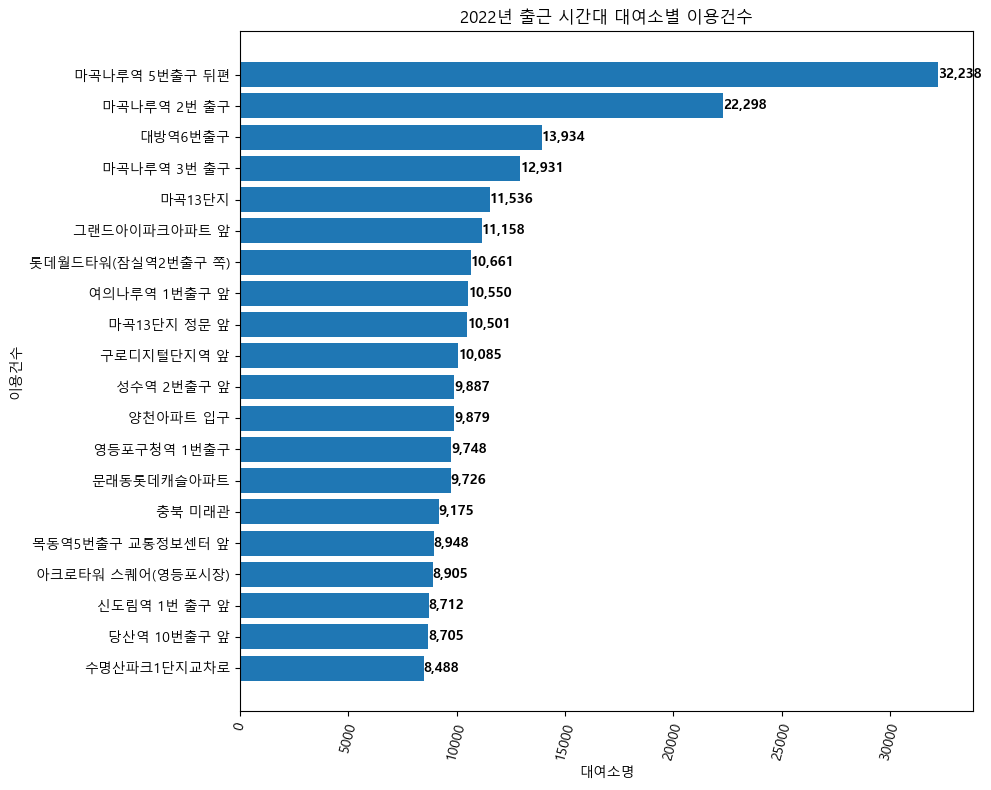

In [159]:
commute_data = group1[group1['출퇴근'] == '출근']

# Creating a bar graph for the '출근' data
import matplotlib.pyplot as plt
top_20_commute_data = commute_data.sort_values(by='이용건수', ascending=False).head(20)
top_20_commute_data = top_20_commute_data.sort_values(by='이용건수', ascending=True)

plt.figure(figsize=(10,8))
bars = plt.barh(top_20_commute_data['대여소명_y'], top_20_commute_data['이용건수'])
plt.title('2022년 출근 시간대 대여소별 이용건수')
plt.xlabel('대여소명')
plt.ylabel('이용건수')

# 각 막대 끝에 이용건수 표시
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
             ha='left', va='center', fontweight='bold')
    
plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()

In [160]:
top_20_commute_data.sort_values(by='이용건수', ascending=False)

,대여소명_y,출퇴근,이용건수
1731,마곡나루역 5번출구 뒤편,출근,32238
1727,마곡나루역 2번 출구,출근,22298
1239,대방역6번출구,출근,13934
1729,마곡나루역 3번 출구,출근,12931
1713,마곡13단지,출근,11536
878,그랜드아이파크아파트 앞,출근,11158
1659,롯데월드타워(잠실역2번출구 쪽),출근,10661
3790,여의나루역 1번출구 앞,출근,10550
1715,마곡13단지 정문 앞,출근,10501
732,구로디지털단지역 앞,출근,10085


- 퇴근 시간대 대여소별 이용건수

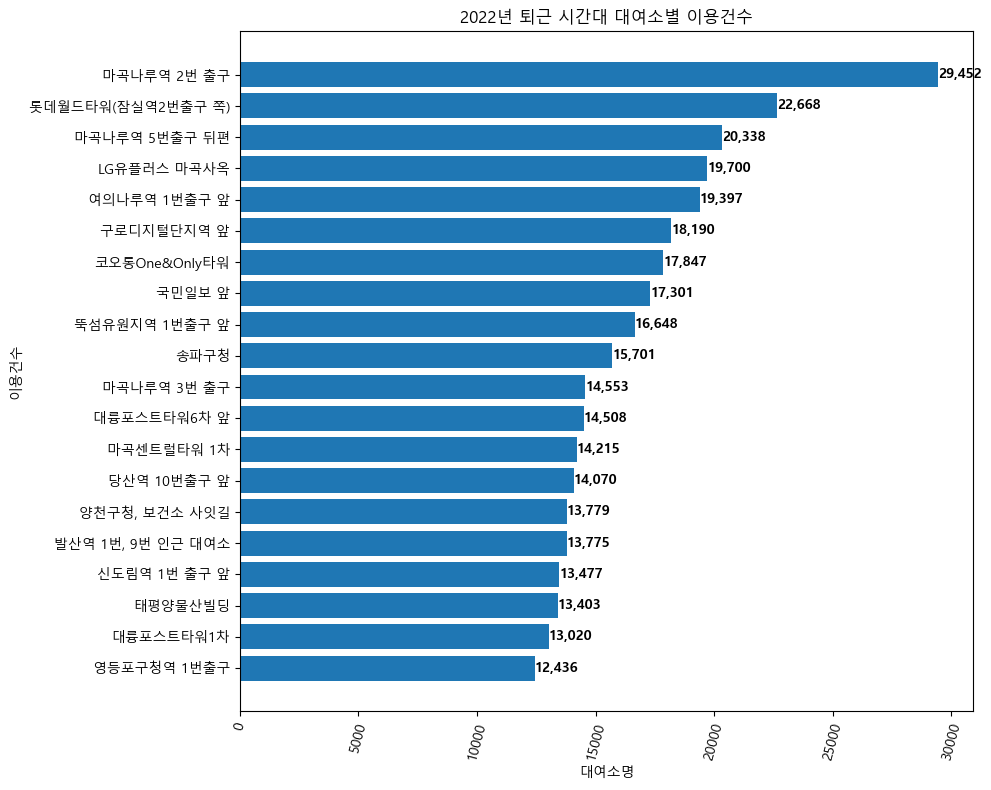

In [162]:
commute_data_2 = group1[group1['출퇴근'] == '퇴근']

# Creating a bar graph for the '출근' data
import matplotlib.pyplot as plt
top_20_commute_data_2 = commute_data_2.sort_values(by='이용건수', ascending=False).head(20)
top_20_commute_data_2 = top_20_commute_data_2.sort_values(by='이용건수', ascending=True)

plt.figure(figsize=(10,8))
bars = plt.barh(top_20_commute_data_2['대여소명_y'], top_20_commute_data_2['이용건수'])
plt.title('2022년 퇴근 시간대 대여소별 이용건수')
plt.xlabel('대여소명')
plt.ylabel('이용건수')

# 각 막대 끝에 이용건수 표시
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
             ha='left', va='center', fontweight='bold')

plt.xticks(rotation=75)
plt.tight_layout()

# Display the plot
plt.show()

In [163]:
top_20_commute_data_2.sort_values(by='이용건수', ascending=False)

,대여소명_y,출퇴근,이용건수
1728,마곡나루역 2번 출구,퇴근,29452
1660,롯데월드타워(잠실역2번출구 쪽),퇴근,22668
1732,마곡나루역 5번출구 뒤편,퇴근,20338
135,LG유플러스 마곡사옥,퇴근,19700
3791,여의나루역 1번출구 앞,퇴근,19397
733,구로디지털단지역 앞,퇴근,18190
4980,코오롱One&Only타워,퇴근,17847
829,국민일보 앞,퇴근,17301
1608,뚝섬유원지역 1번출구 앞,퇴근,16648
3188,송파구청,퇴근,15701


-------------------------------------------------